# SENDA CAFÉ

SENDA CAFÉ es un proyecto de ventas simuladas en un local de venta de café, tanto para consumir en el lugar o take away.

En este proyecto, lo que haremos en primer lugar es el Data Cleaning y luego el EDA, para explorar los datos que tenemos para saber de que tipos son , si hay errores en los en los mismos, cantidad, si hay datos vacíos. Tambien si es necesario de crear nuevas tablas o columnas y así poder obtener los primeros graficos utilizando librerias de Python como Seaborn y Matplotlib.

El objetivo es poder saber la cantidad de ventas en determinados periodos, en que momentos del día se realizan mas ventas. Tambien saber cuales son los empleados que mas ticket emiten por dias, horarios, etc. Saber los costos mensuales, ver cuales de ellos es el mas alto, ya sean costos fijos y/o variables. Detectar cuales son los productos que mas costos tienen o producen. Además analizar el stcok de los productos e insumos y compararlos tambien con los costos y las ventas, para entender qué productos son mas vendidos o si tienen mejor margen de ganacias.


# _______________________________________________________________________________

Importacíon de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from ydata_profiling import ProfileReport
import sweetviz as sv



c:\Users\Fernando\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Fernando\AppData\Local\Programs\Python\Python313\Lib\site-packages\sweetviz\graph.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


# _______________________________________________________________________________

## Exploramos la tabla 'empleados'


Proceso de Data Cleaning & EDA

In [2]:
## Definimos la ruta del archivo
ruta_empleado_csv = r'C:\Users\Fernando\Desktop\Ventas Café Especialidad\Data\empleados.csv'

# Leemos el archivo
df_empleados = pd.read_csv(ruta_empleado_csv)

# Vemos la información
print("Informe: \n")
df_empleados.info()

print("Cantidad de filas y columnas: ", df_empleados.shape)

## Mostramos la tabla (los primeros 100)
df_empleados.head(100)









Informe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   empleado_id     11 non-null     int64 
 1   nombre          11 non-null     object
 2   rol             11 non-null     object
 3   turno           11 non-null     object
 4   sueldo_mensual  11 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 572.0+ bytes
Cantidad de filas y columnas:  (11, 5)


,empleado_id,nombre,rol,turno,sueldo_mensual
0,1,Empleado_1,Cocinero,mañana,450000
1,2,Empleado_2,Cajero,tarde,400000
2,3,Empleado_3,Barista,mañana,420000
3,4,Empleado_4,Camarero,tarde,380000
4,5,Empleado_5,Camarero,mañana,380000
5,6,Empleado_6,Camarero,tarde,380000
6,7,Empleado_7,Camarero,mañana,380000
7,8,Empleado_8,Camarero,tarde,380000
8,9,Empleado_9,Camarero,mañana,380000
9,10,Empleado_10,Camarero,tarde,380000


In [3]:
# Métricas y estadísticas
print("Métricas y Estadísticas: ")
df_empleados.describe()

Métricas y Estadísticas: 


,empleado_id,sueldo_mensual
count,11.000000,11.000000
mean,6.000000,391818.181818
std,3.316625,23159.525823
min,1.000000,380000.000000
25%,3.500000,380000.000000
50%,6.000000,380000.000000
75%,8.500000,390000.000000
max,11.000000,450000.000000


Transformación de tipo de datos

In [4]:
# Convertimos a 'float' la columna "sueldo_mensual"
df_empleados["sueldo_mensual"] = df_empleados["sueldo_mensual"].astype(float)

# Guardamos el cambio en el archivo .csv
df_empleados.to_csv(r'C:\Users\Fernando\Desktop\Ventas Café Especialidad\Data\empleados.csv', index=False)


# _______________________________________________________________________________

# Exploramos la tabla 'ventas'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from ydata_profiling import ProfileReport
import sweetviz as sv


c:\Users\Fernando\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Fernando\AppData\Local\Programs\Python\Python313\Lib\site-packages\sweetviz\graph.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


In [3]:
## Definimos la ruta del archivo
ruta_ventas_csv = r'C:\Users\Fernando\Desktop\Ventas Café Especialidad\Data\ventas.csv'

# Leemos el archivo
df_ventas = pd.read_csv(ruta_ventas_csv)

# Vemos la información
print("Informe: \n")
df_ventas.info()

print("Cantidad de filas y columnas: ", df_ventas.shape)

## Mostramos la tabla (los primeros 100)
df_ventas.head(1250)

Informe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ticket_id     1215 non-null   int64 
 1   fecha         1215 non-null   object
 2   hora          1215 non-null   object
 3   servicio      1215 non-null   object
 4   camarero      1215 non-null   object
 5   productos     1215 non-null   object
 6   cantidades    1215 non-null   object
 7   total_ticket  1215 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 76.1+ KB
Cantidad de filas y columnas:  (1215, 8)


,ticket_id,fecha,hora,servicio,camarero,productos,cantidades,total_ticket
0,1,2025-06-01,08:00,mesa,Camarero_4,Jugo,1,800
1,2,2025-06-01,08:00,mesa,Camarero_1,"Café Espresso, Jugo, Tostado","3, 2, 1",5000
2,3,2025-06-01,08:00,mesa,Camarero_1,Latte,3,2850
3,4,2025-06-01,08:00,mesa,Camarero_3,"Medialuna, Tostado, Latte","3, 2, 1",5050
4,5,2025-06-01,08:00,take_away,Camarero_2,"Latte, Latte","2, 1",2850
...,...,...,...,...,...,...,...,...
1210,1211,2025-06-30,20:00,mesa,Camarero_1,Tostado,3,3900
1211,1212,2025-06-30,20:00,take_away,Camarero_6,"Latte, Latte","1, 1",1900
1212,1213,2025-06-30,20:00,mesa,Camarero_6,"Tostado, Medialuna, Tostado","3, 2, 3",8800
1213,1214,2025-06-30,20:00,take_away,Camarero_4,"Cappuccino, Café Espresso","1, 2",2400


Los tipos de datos estan bien, pero cambiaremos la columna 'fecha' a "datetime" y 'total_ticket' a "float"

In [5]:

## Cambiamos los tipo de datos
# df_ventas["fecha"] = pd.to_datetime(df_ventas["fecha"])
df_ventas["total_ticket"] = df_ventas["total_ticket"].astype(float)

# Guardamos el cambio en el archivo .csv
df_ventas.to_csv(r'C:\Users\Fernando\Desktop\Ventas Café Especialidad\Data\ventas.csv', index=False)

Primeras medidas y visualizaciones de 'ventas'

📊 Medidas iniciales
Vamos a calcular:

Ingresos totales

Ticket promedio

Ventas por tipo de servicio

Ventas por camarero

Ventas por franja horaria

Evolución diaria de ingresos

Ingresos totales: $4,131,900.00
Ticket promedio: $3,400.74


C:\Users\Fernando\AppData\Local\Temp\ipykernel_4172\2819364222.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ventas, x="servicio", y="total_ticket", estimator=sum, palette="viridis")


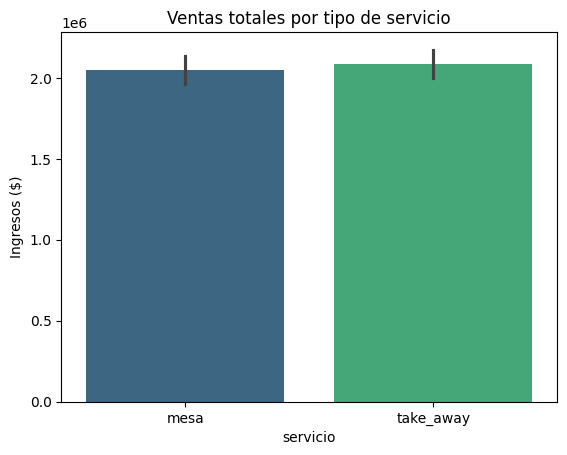

C:\Users\Fernando\AppData\Local\Temp\ipykernel_4172\2819364222.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ventas, x="camarero", y="total_ticket", estimator=sum, palette="crest")


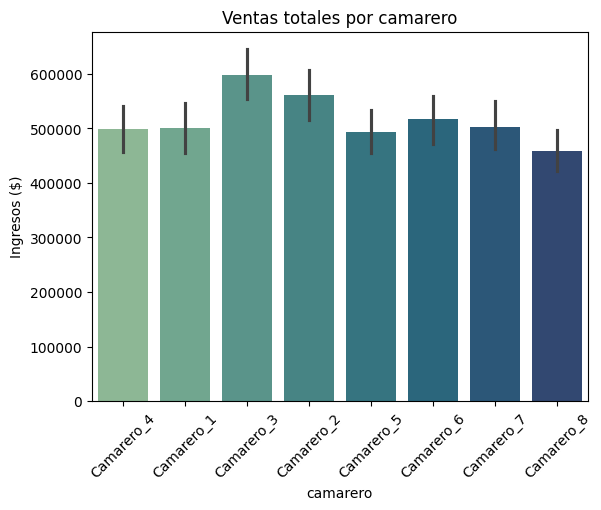

C:\Users\Fernando\AppData\Local\Temp\ipykernel_4172\2819364222.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ventas, x="hora", y="total_ticket", estimator=sum, palette="mako")


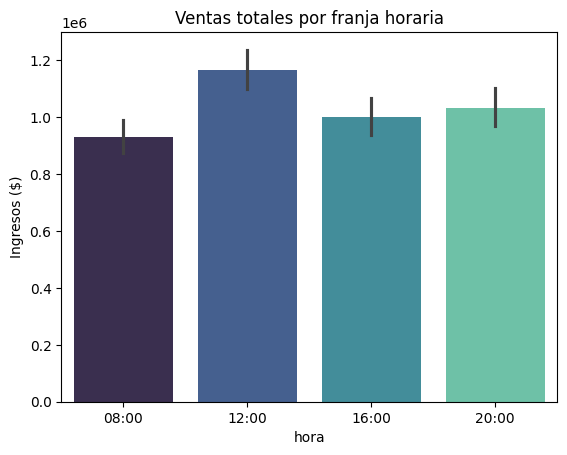

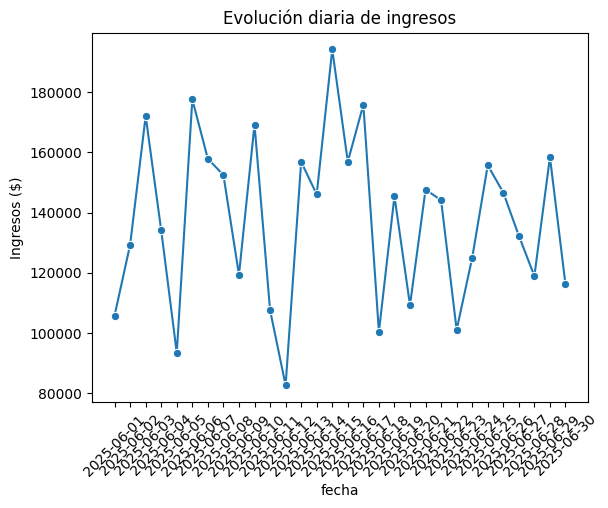

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Definimos la ruta del archivo
ruta_ventas_csv = r'C:\Users\Fernando\Desktop\Ventas Café Especialidad\Data\ventas.csv'

# Cargar datos
df_ventas = pd.read_csv(ruta_ventas_csv)

# ====================
# 1️⃣ Medidas iniciales
# ====================
ingresos_totales = df_ventas["total_ticket"].sum()
ticket_promedio = df_ventas["total_ticket"].mean()

print(f"Ingresos totales: ${ingresos_totales:,.2f}")
print(f"Ticket promedio: ${ticket_promedio:,.2f}")

# ===================================
# 2️⃣ Visualización: ventas por servicio
# ===================================
sns.barplot(data=df_ventas, x="servicio", y="total_ticket", estimator=sum, palette="viridis")
plt.title("Ventas totales por tipo de servicio")
plt.ylabel("Ingresos ($)")
plt.show()

# ===================================
# 3️⃣ Visualización: ventas por camarero
# ===================================
sns.barplot(data=df_ventas, x="camarero", y="total_ticket", estimator=sum, palette="crest")
plt.title("Ventas totales por camarero")
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.show()

# ===================================
# 4️⃣ Visualización: ventas por franja horaria
# ===================================
sns.barplot(data=df_ventas, x="hora", y="total_ticket", estimator=sum, palette="mako")
plt.title("Ventas totales por franja horaria")
plt.ylabel("Ingresos ($)")
plt.show()

# ===================================
# 5️⃣ Evolución diaria de ingresos
# ===================================
ventas_diarias = df_ventas.groupby("fecha")["total_ticket"].sum().reset_index()
sns.lineplot(data=ventas_diarias, x="fecha", y="total_ticket", marker="o")
plt.title("Evolución diaria de ingresos")
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.show()


KPIs

In [7]:
# Ingresos totales
ingresos_totales = df_ventas["total_ticket"].sum()

# Ticket promedio
ticket_promedio = df_ventas["total_ticket"].mean()

# Total tickets
cantidad_tickets = df_ventas.shape[0]

# Ingresos por servicio
ingresos_por_servicio = df_ventas.groupby("servicio")["total_ticket"].sum()

# Ingresos por camarero
ingresos_por_camarero = df_ventas.groupby("camarero")["total_ticket"].sum().sort_values(ascending=False)

# Promedio diario
promedio_diario = df_ventas.groupby("fecha")["total_ticket"].sum().mean()

# Día de mayores ingresos
dia_max_ingresos = df_ventas.groupby("fecha")["total_ticket"].sum().idxmax()

# Mostrar resultados
print(f"📈 Ingresos totales: ${ingresos_totales:,.2f}")
print(f"💰 Ticket promedio: ${ticket_promedio:,.2f}")
print(f"🎫 Total tickets: {cantidad_tickets}")
print("\nVentas por servicio:\n", ingresos_por_servicio)
print("\nTop camareros:\n", ingresos_por_camarero)
print(f"\n📅 Promedio diario de ingresos: ${promedio_diario:,.2f}")
print(f"🏆 Día con mayores ingresos: {dia_max_ingresos}")


📈 Ingresos totales: $4,131,900.00
💰 Ticket promedio: $3,400.74
🎫 Total tickets: 1215

Ventas por servicio:
 servicio
mesa         2048450.0
take_away    2083450.0
Name: total_ticket, dtype: float64

Top camareros:
 camarero
Camarero_3    597950.0
Camarero_2    561850.0
Camarero_6    517700.0
Camarero_7    502450.0
Camarero_1    501050.0
Camarero_4    498700.0
Camarero_5    493150.0
Camarero_8    459050.0
Name: total_ticket, dtype: float64

📅 Promedio diario de ingresos: $137,730.00
🏆 Día con mayores ingresos: 2025-06-15
